In [18]:
!cp kaggle.json ~/.kaggle/

In [19]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

100% 86.8M/86.8M [00:02<00:00, 45.9MB/s]
100% 86.8M/86.8M [00:02<00:00, 38.2MB/s]


In [20]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [33]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [34]:
train_generator = train_datagen.flow_from_directory(
    '/content/Training',
    target_size=(150, 150),  # Adjust the target size based on your dataset
    batch_size=32,
    class_mode='categorical'  # Assuming it's a classification task
)

test_generator = test_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(150, 150),  # Adjust the target size based on your dataset
    batch_size=32,
    class_mode='categorical'  # Assuming it's a classification task
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/20
89/89 [==============================] - 10s 82ms/step - loss: 0.9075 - accuracy: 0.6173 - val_loss: 2.1170 - val_accuracy: 0.3724
Epoch 2/20
89/89 [==============================] - 7s 84ms/step - loss: 0.5231 - accuracy: 0.7851 - val_loss: 3.0379 - val_accuracy: 0.4714
Epoch 3/20
89/89 [==============================] - 7s 83ms/step - loss: 0.3179 - accuracy: 0.8791 - val_loss: 2.0407 - val_accuracy: 0.6667
Epoch 4/20
89/89 [==============================] - 7s 75ms/step - loss: 0.2130 - accuracy: 0.9225 - val_loss: 2.7294 - val_accuracy: 0.7161
Epoch 5/20
89/89 [==============================] - 7s 83ms/step - loss: 0.1182 - accuracy: 0.9570 - val_loss: 3.6090 - val_accuracy: 0.6901
Epoch 6/20
89/89 [==============================] - 6s 67ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 5.0843 - val_accuracy: 0.7292
Epoch 7/20
89/89 [==============================] - 7s 82ms/step - loss: 0.0656 - accuracy: 0.9799 - val_loss: 4.6211 - val_accuracy: 0.7083
Epoch 8/20
8

In [38]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

13/13 [==============================] - 1s 81ms/step - loss: 8.3945 - accuracy: 0.7360
Test Accuracy: 73.60%


In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


1/1 [==============================] - 0s 304ms/step


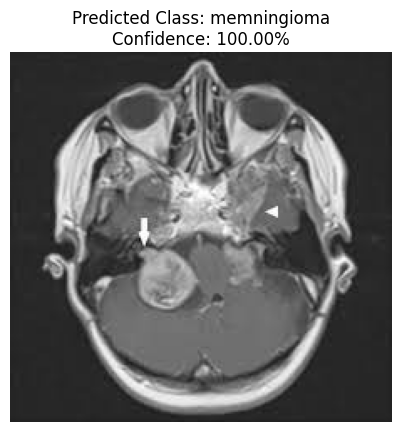

In [40]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust the target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array


image_path = '/content/Testing/meningioma_tumor/image(100).jpg'  # Change to the actual path


preprocessed_image = preprocess_image(image_path)


predictions = model.predict(preprocessed_image)


class_labels = ['giloma', 'memningioma', 'no_tumor', 'pituitary']


predicted_class_index = np.argmax(predictions)


predicted_class_label = class_labels[predicted_class_index]


confidence_level = predictions[0][predicted_class_index]


img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.title(f'Predicted Class: {predicted_class_label}\nConfidence: {confidence_level:.2%}')
plt.show()